In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import itemfreq
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

import datetime
from datetime import date, timedelta

In [2]:
dataset = pd.read_csv(r'C:\Users\Matome.Molokome\Desktop\Unisa\2021\HRCOS82 Research\favorita-grocery-sales-forecasting\data.csv')
dataset[dataset['unit_sales'] < 0] = 0


In [3]:
dataset.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions,month,dayofthemonth,dayofweek
256493,2017-08-03,22,940592,3.000,1,3016,0,7,7,2,16,11,0,49.030000,783,8,3,3
1442131,2017-08-14,44,155600,8.000,0,1034,0,12,5,0,18,12,0,47.590000,4039,8,14,0
1347464,2017-08-13,47,1167175,7.000,0,1016,0,12,14,0,18,12,0,48.908317,3741,8,13,6
103772,2017-08-01,52,361502,4.000,0,1036,0,12,11,0,14,10,0,49.190000,2147,8,1,1
321289,2017-08-04,2,319095,3.000,1,2640,1,9,13,3,18,12,0,49.570000,1938,8,4,4
583007,2017-08-06,26,323921,4.000,0,4114,0,25,10,3,8,6,0,48.908317,623,8,6,6
462706,2017-08-05,20,1695901,11.429,0,2008,1,30,6,1,18,12,1,48.908317,1977,8,5,5
1071097,2017-08-11,11,1165988,3.000,0,1028,0,12,6,1,2,12,1,48.810000,2254,8,11,4
1254512,2017-08-12,52,1179109,3.000,0,1040,0,12,11,0,14,10,0,48.908317,2804,8,12,5
729960,2017-08-07,46,1913600,4.000,0,4118,0,25,14,0,18,12,0,49.370000,3333,8,7,0


In [5]:
#Shape
print('Shape : ', dataset.shape, '\n')

#Type
print('Type : ', '\n', dataset.dtypes)

#Summary
dataset.describe()

Shape :  (1570850, 18) 

Type :  
 date               object
store_nbr           int64
item_nbr            int64
unit_sales        float64
onpromotion         int64
class               int64
perishable          int64
family_numeric      int64
cluster             int64
type_numeric        int64
city_numeric        int64
state_numeric       int64
Holiday             int64
dcoilwtico        float64
transactions        int64
month               int64
dayofthemonth       int64
dayofweek           int64
dtype: object


,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions,month,dayofthemonth,dayofweek
count,1.570850e+06,1.570850e+06,1.570850e+06,1.570850e+06,1.570850e+06,1.570850e+06,1.570850e+06,1.570850e+06,1.570850e+06,1.570850e+06,1.570850e+06,1.570850e+06,1.570850e+06,1.570850e+06,1570850.0,1.570850e+06,1.570850e+06
mean,2.830716e+01,1.172580e+06,7.915433e+00,1.020327e-01,1.971751e+03,2.583544e-01,1.212401e+01,8.703154e+00,1.898925e+00,1.286541e+01,9.157449e+00,2.653519e-01,4.890831e+01,1.837534e+03,8.0,7.938334e+00,2.896155e+00
std,1.630607e+01,5.871004e+05,2.218538e+01,3.026913e-01,1.198682e+03,4.377300e-01,7.902223e+00,4.566203e+00,1.294191e+00,6.322527e+00,4.114984e+00,4.415205e-01,5.949180e-01,9.762248e+02,0.0,4.333238e+00,2.007334e+00
min,1.000000e+00,9.699500e+04,1.900000e-02,0.000000e+00,1.002000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.757000e+01,4.160000e+02,8.0,1.000000e+00,0.000000e+00
25%,1.300000e+01,6.925370e+05,2.000000e+00,0.000000e+00,1.058000e+03,0.000000e+00,7.000000e+00,5.000000e+00,1.000000e+00,8.000000e+00,6.000000e+00,0.000000e+00,4.881000e+01,1.130000e+03,8.0,4.000000e+00,1.000000e+00
50%,2.900000e+01,1.213906e+06,4.000000e+00,0.000000e+00,1.190000e+03,0.000000e+00,1.200000e+01,9.000000e+00,2.000000e+00,1.600000e+01,1.200000e+01,0.000000e+00,4.890832e+01,1.525000e+03,8.0,8.000000e+00,3.000000e+00
75%,4.400000e+01,1.583523e+06,8.000000e+00,0.000000e+00,2.704000e+03,1.000000e+00,1.200000e+01,1.300000e+01,3.000000e+00,1.800000e+01,1.200000e+01,1.000000e+00,4.937000e+01,2.324000e+03,8.0,1.200000e+01,5.000000e+00
max,5.400000e+01,2.127114e+06,4.908000e+03,1.000000e+00,7.780000e+03,1.000000e+00,3.200000e+01,1.700000e+01,4.000000e+00,2.100000e+01,1.500000e+01,1.000000e+00,4.960000e+01,5.037000e+03,8.0,1.500000e+01,6.000000e+00


In [6]:
print('Shape : ', dataset.shape)
dataset.sample(10)

Shape :  (1570850, 18)


,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions,month,dayofthemonth,dayofweek
1511930,2017-08-15,24,1609719,7.000,0,2002,1,30,1,3,8,6,1,47.570000,2138,8,15,1
654292,2017-08-07,5,804932,1.000,0,1122,0,3,4,3,21,14,0,49.370000,1348,8,7,0
1113705,2017-08-11,37,660503,2.000,0,2124,1,8,2,3,3,0,1,48.810000,1122,8,11,4
1322765,2017-08-13,36,838875,1.000,0,1042,0,12,10,4,11,6,0,48.908317,1159,8,13,6
585522,2017-08-06,27,1157329,23.000,0,1022,0,12,1,3,4,6,0,48.908317,1998,8,6,6
80703,2017-08-01,43,502227,5.000,0,1096,0,12,10,4,6,5,0,49.190000,1527,8,1,1
1041406,2017-08-10,50,1695900,10.406,0,2008,1,30,14,0,0,15,1,48.540000,2600,8,10,3
248301,2017-08-03,17,1576314,1.000,0,5324,0,6,12,2,18,12,0,49.030000,1384,8,3,3
603263,2017-08-06,37,1360010,1.000,0,6329,0,16,2,3,3,0,0,48.908317,1054,8,6,6
393468,2017-08-04,42,1239845,1.000,0,2170,1,8,2,3,3,0,0,49.570000,1166,8,4,4


In [7]:
# Separate features and labels
X_dataset, y_labels= dataset[['month','store_nbr', 'item_nbr','onpromotion','perishable','class','family_numeric','cluster','type_numeric','city_numeric','state_numeric','Holiday','dcoilwtico','transactions','dayofthemonth','dayofweek']].values, dataset['unit_sales'].values
print('Features:',X_dataset[:10], '\nLabels:', y_labels[:10], sep='\n')
#print('Shape X :', X_dataset.shape)
#print('Shape y :', y_labels.shape)

Features:
[[8.00000e+00 1.00000e+00 1.03520e+05 0.00000e+00 0.00000e+00 1.02800e+03
  1.20000e+01 1.30000e+01 3.00000e+00 1.80000e+01 1.20000e+01 0.00000e+00
  4.91900e+01 1.79500e+03 1.00000e+00 1.00000e+00]
 [8.00000e+00 1.00000e+00 1.03665e+05 0.00000e+00 1.00000e+00 2.71200e+03
  5.00000e+00 1.30000e+01 3.00000e+00 1.80000e+01 1.20000e+01 0.00000e+00
  4.91900e+01 1.79500e+03 1.00000e+00 1.00000e+00]
 [8.00000e+00 1.00000e+00 1.05574e+05 0.00000e+00 0.00000e+00 1.04500e+03
  1.20000e+01 1.30000e+01 3.00000e+00 1.80000e+01 1.20000e+01 0.00000e+00
  4.91900e+01 1.79500e+03 1.00000e+00 1.00000e+00]
 [8.00000e+00 1.00000e+00 1.05575e+05 0.00000e+00 0.00000e+00 1.04500e+03
  1.20000e+01 1.30000e+01 3.00000e+00 1.80000e+01 1.20000e+01 0.00000e+00
  4.91900e+01 1.79500e+03 1.00000e+00 1.00000e+00]
 [8.00000e+00 1.00000e+00 1.05693e+05 0.00000e+00 0.00000e+00 1.03400e+03
  1.20000e+01 1.30000e+01 3.00000e+00 1.80000e+01 1.20000e+01 0.00000e+00
  4.91900e+01 1.79500e+03 1.00000e+00 1.00000e

In [8]:
num_test = 0.30
X_train, X_validation, y_train, y_validation = train_test_split(X_dataset, y_labels, test_size=num_test, random_state=15)
print('X_train shape :', X_train.shape)
print('y_train shape :', y_train.shape)
print('X_validation shape :', X_validation.shape)
print('y_validation shape :', y_validation.shape)

X_train shape : (1099595, 16)
y_train shape : (1099595,)
X_validation shape : (471255, 16)
y_validation shape : (471255,)


In [9]:
import keras

# Convert data as np.array
features = np.array(X_train)
targets = np.array(y_train.reshape(y_train.shape[0],1))
features_validation= np.array(X_validation)
targets_validation = np.array(y_validation.reshape(y_validation.shape[0],1))

#print(features[:10])
#print(targets[:10])

Using TensorFlow backend.
C:\Users\Matome.Molokome\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Matome.Molokome\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Matome.Molokome\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

In [10]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

# Building the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(1))

# Compiling the model
model.compile(loss = 'mse', optimizer='adam', metrics=['mse']) #mse: mean_square_error
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Training the model
epochs_tot = 1000
epochs_step = 250
epochs_ratio = int(epochs_tot / epochs_step)
hist =np.array([])

for i in range(epochs_ratio):
    history = model.fit(features, targets, epochs=epochs_step, batch_size=100, verbose=0)
    
    # Evaluating the model on the training and testing set
    print("Step : " , i * epochs_step, "/", epochs_tot)
    score = model.evaluate(features, targets)
    print("Training MSE:", score[1])
   


Step :  0 / 1000
1099595/1099595 [==============================] - 14s 13us/step
Training MSE: 468.8747253417969
Step :  250 / 1000
1099595/1099595 [==============================] - 13s 12us/step
Training MSE: 468.8766174316406
Step :  500 / 1000
1099595/1099595 [==============================] - 15s 14us/step
Training MSE: 468.87554931640625
Step :  750 / 1000
1099595/1099595 [==============================] - 16s 14us/step
Training MSE: 468.8760681152344


In [15]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score
predictions = model.predict(features_validation, verbose=0)

print('R2 score = ',r2_score(y_validation, predictions), '/ 1.0')
print('MSE score = ',mean_squared_error(y_validation, predictions), '/ 0.0')

R2 score =  -2.2807127741941713e-08 / 1.0
MSE score =  546.5975161920762 / 0.0


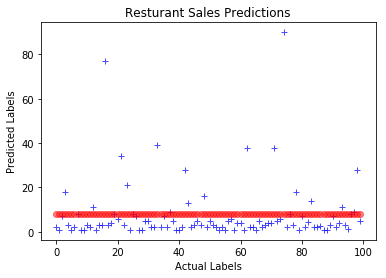

In [16]:
#Check and plot the 50 first predictions
plt.plot(y_validation [0:100], '+', color ='blue', alpha=0.7)
plt.plot(predictions[0:100], 'ro', color ='red', alpha=0.5)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Resturant Sales Predictions')
plt.show()

